In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Read data

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


-----------

## Data processing

In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
data.Transmission.value_counts() 

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [6]:
data.Transmission = data.Transmission.replace(['Manual','Automatic'],[0,1])

In [7]:
data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
data.Fuel_Type = data.Fuel_Type.replace(['Petrol','Diesel','CNG'],[0,1,2])

In [9]:
data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
data.Seller_Type = data.Seller_Type.replace(['Dealer','Individual'],[0,1])

In [11]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [12]:
X = data.drop(['Selling_Price','Car_Name'],axis=1)
Y = data['Selling_Price']

In [13]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [14]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [15]:
print(X.shape,Y.shape)

(301, 7) (301,)


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [17]:
print(X_train.shape,X_test.shape)

(270, 7) (31, 7)


------------

## Linear Regression Model

In [18]:
lin_reg_model = LinearRegression()

In [19]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [20]:
prediction = lin_reg_model.predict(X_test)

In [21]:
# R squared Error
error_score = metrics.r2_score(Y_test, prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715026905


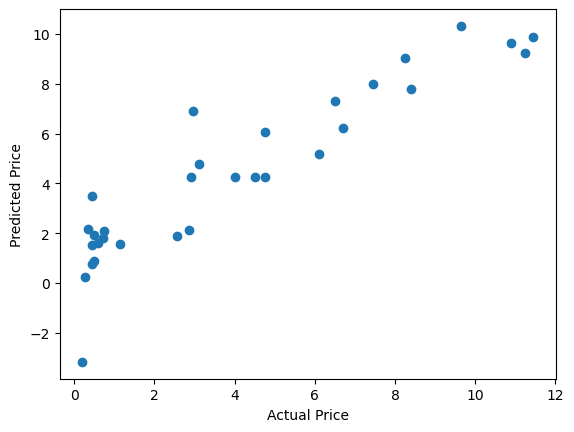

In [22]:
plt.scatter(Y_test, prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [23]:
prediction

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [24]:
import numpy as np
np.array(Y_test)

array([ 9.65,  0.45,  4.75,  3.1 , 11.45,  4.5 ,  2.95,  6.5 ,  0.27,
        6.1 ,  6.7 ,  4.75,  0.35,  8.4 ,  2.55,  0.72,  0.75,  0.48,
       11.25,  4.  ,  1.15,  8.25,  0.45, 10.9 ,  0.5 ,  7.45,  0.6 ,
        0.2 ,  2.9 ,  2.85,  0.45])

--------------

## Lasso Regression Model

In [25]:
lass_reg_model = Lasso()

In [26]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [27]:
prediction2 = lass_reg_model.predict(X_test)

In [28]:
# R squared Error
error_score = metrics.r2_score(Y_test, prediction2)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


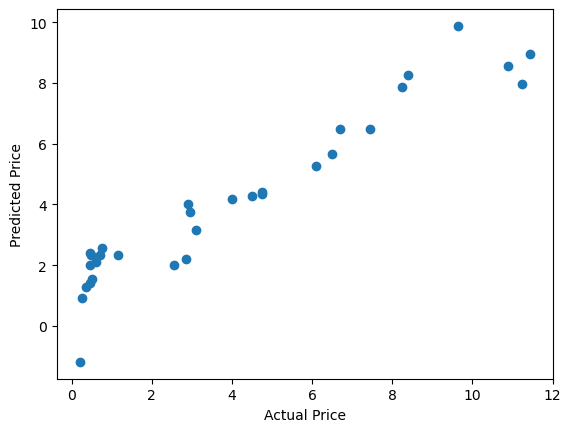

In [29]:
plt.scatter(Y_test, prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [30]:
prediction2

array([ 9.87888122,  1.42396266,  4.33267834,  3.17313445,  8.95590579,
        4.29397384,  3.73913632,  5.66283974,  0.91478394,  5.25514316,
        6.47238818,  4.39507335,  1.2955156 ,  8.26559961,  2.00292338,
        2.32529219,  2.55349653,  2.34742172,  7.96895166,  4.18441245,
        2.3369918 ,  7.86598537,  2.02308236,  8.56734786,  1.55498136,
        6.48561097,  2.11427451, -1.18422036,  4.01710445,  2.21749695,
        2.41820898])

In [31]:
np.array(Y_test)

array([ 9.65,  0.45,  4.75,  3.1 , 11.45,  4.5 ,  2.95,  6.5 ,  0.27,
        6.1 ,  6.7 ,  4.75,  0.35,  8.4 ,  2.55,  0.72,  0.75,  0.48,
       11.25,  4.  ,  1.15,  8.25,  0.45, 10.9 ,  0.5 ,  7.45,  0.6 ,
        0.2 ,  2.9 ,  2.85,  0.45])